<a href="https://colab.research.google.com/github/adikush1/Modelling-And-Forecasting-Exchange-Rate/blob/main/modelling_exchange_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
train_df=pd.read_csv("/PPOC.csv")
train_df

,Unnamed: 0,Year,FDI in % of GDP,GDP growth,TradeBalance,Inflation,Exchange Rate(INR/USD),Real Interest Rate
0,0,1973,0.044331,3.295521,-554.6,16.940816,8.1100,10.774631
1,1,1974,0.057241,1.185336,"-1,498.70",28.598734,8.0952,10.774631
2,2,1975,-0.010486,9.149912,"-1,415.90",5.748430,8.9827,10.774631
3,3,1976,-0.007503,1.663104,75.7,-7.633948,8.8535,10.774631
4,4,1977,-0.029682,7.254765,-712.5,8.307470,8.5371,10.774631
5,5,1978,0.013175,5.712532,"-1,318.30",2.523049,8.2160,10.774631
6,6,1979,0.031747,-5.238183,"-3,364.20",6.275683,8.0995,-1.061146
7,7,1980,0.042485,6.735822,"-7,380.50",11.346073,7.9314,4.476508
8,8,1981,0.047506,6.006204,"-6,468.20",13.112547,9.1305,5.118237
9,9,1982,0.035912,3.475733,"-5,677.40",7.890743,9.6926,7.774707


In [ ]:
train_df=train_df.drop('Unnamed: 0',axis=1)

In [ ]:
train_df['TradeBalance'] = train_df['TradeBalance'].str.replace(',', '').astype(float)

In [ ]:
train_df.head()

,Year,FDI in % of GDP,GDP growth,TradeBalance,Inflation,Exchange Rate(INR/USD),Real Interest Rate
0,1973,0.044331,3.295521,-554.6,16.940816,8.1100,10.774631
1,1974,0.057241,1.185336,-1498.7,28.598734,8.0952,10.774631
2,1975,-0.010486,9.149912,-1415.9,5.748430,8.9827,10.774631
3,1976,-0.007503,1.663104,75.7,-7.633948,8.8535,10.774631
4,1977,-0.029682,7.254765,-712.5,8.307470,8.5371,10.774631


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    48 non-null     int64  
 1   FDI in % of GDP         48 non-null     float64
 2   GDP growth              48 non-null     float64
 3   TradeBalance            48 non-null     float64
 4   Inflation               48 non-null     float64
 5   Exchange Rate(INR/USD)  48 non-null     float64
 6   Real Interest Rate      48 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.8 KB


Correlation

(7.5, -0.5)

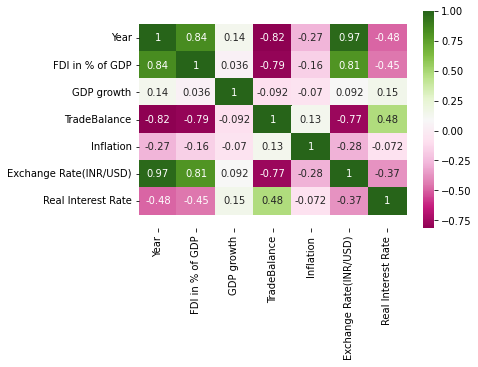

In [ ]:
correlation=train_df.corr()
ax=sn.heatmap(correlation,annot=True,cmap="PiYG")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

1. Logically, exchange rate and trade balance are negatively correlated which says if the trade balance is positive, INR will appreciate.
2. Secondly, exchange rate and real interest rate are negatively correlated which says if interest rate is high then the foreign investment will increase and so currency appreciates.


# Analysis

Inflation

Text(0, 0.5, 'CPI')

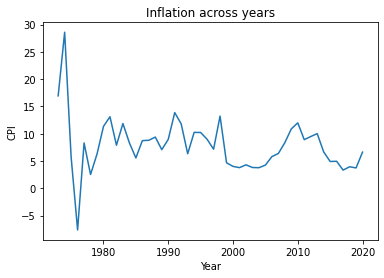

In [ ]:
plt.plot(train_df['Year'],train_df['Inflation'])
plt.title('Inflation across years')
plt.xlabel('Year')
plt.ylabel('CPI')

Here we can see

1. Around 1973-74 due to over dependence of fuel import, inflation crossed above 20% for the first time in the history

2. During 1991 Indian economic crisis led to hike inflation

3. 2008 Global Financial Crisis has led to another spike in inflation


Exchange Rate

Text(0, 0.5, 'Exchange Rate')

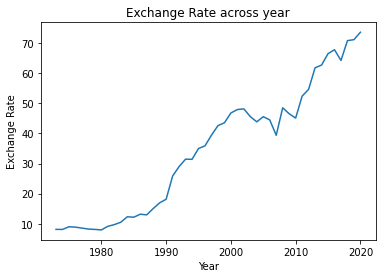

In [ ]:
plt.plot(train_df['Year'],train_df['Exchange Rate(INR/USD)'])
plt.title('Exchange Rate across year')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')

1. Exchange rate is showing steady upward trend not just because of Indian Rupee is depreciating but also due to strengthening of Dollar

2. In multiple parts of history to promote the export and increase export competitiveness, India has depreciated its currency against Dollar

FDI as % of GDP

Text(0, 0.5, 'FDI in % of GDP')

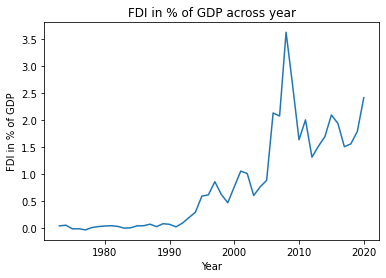

In [ ]:
plt.plot(train_df['Year'],train_df['FDI in % of GDP'])
plt.title('FDI in % of GDP across year')
plt.xlabel('Year')
plt.ylabel('FDI in % of GDP')

FDI has steady increase across years.

In recent years, FDI inflow is seeing record high numbers

GDP Growth

Text(0, 0.5, 'GDP Growth')

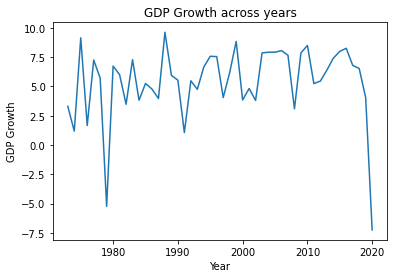

In [ ]:
plt.plot(train_df['Year'],train_df['GDP growth'])
plt.title('GDP Growth across years')
plt.xlabel('Year')
plt.ylabel('GDP Growth')

# Regression Model

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x=train_df[['TradeBalance','Real Interest Rate']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 2.27546126e+01, -2.63712853e-04, -4.70062929e-02])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.598
Model:                                OLS   Adj. R-squared:                  0.581
Method:                     Least Squares   F-statistic:                     33.53
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           1.21e-09
Time:                            16:20:53   Log-Likelihood:                -192.59
No. Observations:                      48   AIC:                             391.2
Df Residuals:                          45   BIC:                             396.8
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.7546      6.297      3.613      0.001      10.071      35.438
TradeBalance          -0.0003   3.68e-05     -7.167      0.000      -0.000      -0.000
Real Interest Rate    -0.0470      0.785     -0.060      0.953      -1.628       1.534
==============================================================================
Omnibus:                       16.480   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.087
Skew:                           0.312   Prob(JB):                        0.130
Kurtosis:                       1.714   Cond. No.                     2.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['TradeBalance','Real Interest Rate','FDI in % of GDP']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 1.62733862e+01, -1.29608290e-04,  3.37910450e-01,  1.24093426e+01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.702
Model:                                OLS   Adj. R-squared:                  0.681
Method:                     Least Squares   F-statistic:                     34.50
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           1.26e-11
Time:                            16:20:59   Log-Likelihood:                -185.45
No. Observations:                      48   AIC:                             378.9
Df Residuals:                          44   BIC:                             386.4
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 16.2734      5.734      2.838      0.007       4.716      27.830
TradeBalance          -0.0001    4.7e-05     -2.758      0.008      -0.000   -3.49e-05
Real Interest Rate     0.3379      0.691      0.489      0.627      -1.055       1.731
FDI in % of GDP       12.4093      3.179      3.903      0.000       6.002      18.817
==============================================================================
Omnibus:                        5.571   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                2.307
Skew:                          -0.180   Prob(JB):                        0.316
Kurtosis:                       1.988   Cond. No.                     2.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['TradeBalance','Real Interest Rate','FDI in % of GDP','Inflation']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 2.32346594e+01, -1.25666074e-04,  1.29478977e-01,  1.17609844e+01,
       -6.25230684e-01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.722
Model:                                OLS   Adj. R-squared:                  0.696
Method:                     Least Squares   F-statistic:                     27.90
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           1.86e-11
Time:                            16:21:05   Log-Likelihood:                -183.77
No. Observations:                      48   AIC:                             377.5
Df Residuals:                          43   BIC:                             386.9
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 23.2347      6.851      3.391      0.002       9.418      37.052
TradeBalance          -0.0001    4.6e-05     -2.734      0.009      -0.000    -3.3e-05
Real Interest Rate     0.1295      0.686      0.189      0.851      -1.253       1.512
FDI in % of GDP       11.7610      3.127      3.761      0.001       5.454      18.068
Inflation             -0.6252      0.354     -1.765      0.085      -1.340       0.089
==============================================================================
Omnibus:                        5.372   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.532
Skew:                          -0.275   Prob(JB):                        0.282
Kurtosis:                       2.018   Cond. No.                     3.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x=train_df[['TradeBalance','Real Interest Rate','FDI in % of GDP','Inflation','GDP growth']]

In [ ]:
y=train_df['Exchange Rate(INR/USD)']

In [ ]:
xnew = sm.add_constant(x)
model = sm.OLS(y,xnew)
results = model.fit()
np.array(results.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([ 2.25607114e+01, -1.23185990e-04,  7.73989884e-02,  1.17977403e+01,
       -6.21727637e-01,  1.95892183e-01])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Exchange Rate(INR/USD)   R-squared:                       0.723
Model:                                OLS   Adj. R-squared:                  0.690
Method:                     Least Squares   F-statistic:                     21.89
Date:                    Wed, 06 Jul 2022   Prob (F-statistic):           9.99e-11
Time:                            16:21:10   Log-Likelihood:                -183.70
No. Observations:                      48   AIC:                             379.4
Df Residuals:                          42   BIC:                             390.6
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.5607      7.181      3.142      0.003       8.069      37.052
TradeBalance          -0.0001    4.7e-05     -2.623      0.012      -0.000   -2.84e-05
Real Interest Rate     0.0774      0.708      0.109      0.913      -1.352       1.507
FDI in % of GDP       11.7977      3.161      3.732      0.001       5.418      18.177
Inflation             -0.6217      0.358     -1.736      0.090      -1.344       0.101
GDP growth             0.1959      0.555      0.353      0.726      -0.925       1.317
==============================================================================
Omnibus:                        6.117   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                2.588
Skew:                          -0.247   Prob(JB):                        0.274
Kurtosis:                       1.976   Cond. No.                     3.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finding VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [ ]:
vif_data

,feature,VIF
0,TradeBalance,4.329031
1,Real Interest Rate,3.867425
2,FDI in % of GDP,4.580814
3,Inflation,2.575794
4,GDP growth,3.842033


VIF is below 10 so no multicollinearity

# Evaluation

In [ ]:
y_pred=22.7546-0.0003*train_df['TradeBalance']-0.0470*train_df['Real Interest Rate']

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, y_pred))

RMSE value

In [ ]:
rms

13.661474573364085